<a href="https://colab.research.google.com/github/Anshuman-37/MLIS_Project_Ideal/blob/main/Main_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is the main jupyter notebook for the coursework of MLIS 
## Grp 1A 
## Authors
## Alpaslan Erdag , Anshuman Singh , Yixin Fan
## Date - 15/01/2022

# <center> Abstract </center>
​
 Todo - Write some abstract about the data giving some information about
 
 The data is obtanined from UCI repository which can be obtained from the [here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)



In [2]:
# Also should we show this ? tell me your thoughts
# about_data ='/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.names'
about_data = '/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.names'
with open(about_data) as f:
    print(f.read())

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

<h1><center>About code (Suggest a good heading)</center></h1>

<h2><em>The code is divided in the following modules/parts/chapters?</h2>
<ol>
<li> <h4> Data Cleaning and Data Preprocessing </h4></li> 
<li> <h4>Model Fiting on the clean data </h4></li> 
<li> <h4>Model Accuracy </h4></li>
</ol>
</em>

<h2><center>1. Data Cleaning and Data Preprocessing</center></h2>

<p>To get a good result over model accuracies we are going to first clean the data and then used the cleaned and preprocessed data to train a model. </p>

<p> We will be using a systematic approach to clean our data. That will be listed in the following steps</p>
<em>
&emsp; <li>Data Visulaization</li>
&emsp; <li>Checking and Removing nan values</li>
&emsp; <li>Removing Useless Attributes</li>
&emsp; <li>Deleting Outliers and Data Normalizations</li>
</em>

<h3>1.1 Data Visualization </h3>

In [3]:
## Header Files 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import scipy

## Loading Data 
#data = '/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.data'
#data = '/content/breast-cancer-wisconsin.data'
data = '/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.data'

In [4]:
col_name = ['Samplecodenumber','ClumpThickness','UniformityofCellSize','UniformityofCellShape',
            'MarginalAdhesion','SingleEpithelialCellSize','BareNuclei',
            'BlandChromatin','NormalNucleoli','Mitoses','Class']
cancerdata = pd.read_csv(data,low_memory=False,names=col_name)
cancerdata.head()

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
## Removing attribute that is of no use
cancerdata = cancerdata.drop(['Samplecodenumber'], 1)

In [6]:
# The number of samples present by class count
cancerdata['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [7]:
# Making the class counts to similar size
Benign = cancerdata[(cancerdata.Class == 2) ].sample(240).index
Malignant = cancerdata[(cancerdata.Class == 4) ].sample(240).index
cancer = cancerdata.loc[Benign|Malignant]
cancer = cancer.reset_index(drop=True)

# Making the classess from 2/4 to 0/1 
cancer['classes'] = cancer.Class.map({2:0,4:1})
cancer = cancer.drop(['Class'], 1)

# Printing the updated dataframe
cancer.head()

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,classes
0,6,8,8,1,3,4,3,7,1,0
1,8,10,10,8,7,10,9,7,1,1
2,2,1,2,1,2,1,3,1,1,0
3,2,1,1,1,2,1,1,1,5,0
4,1,1,1,1,1,1,3,1,1,0


In [8]:
# Confirming that counts of the classes are similar 
cancer['classes'].value_counts()


0    240
1    240
Name: classes, dtype: int64

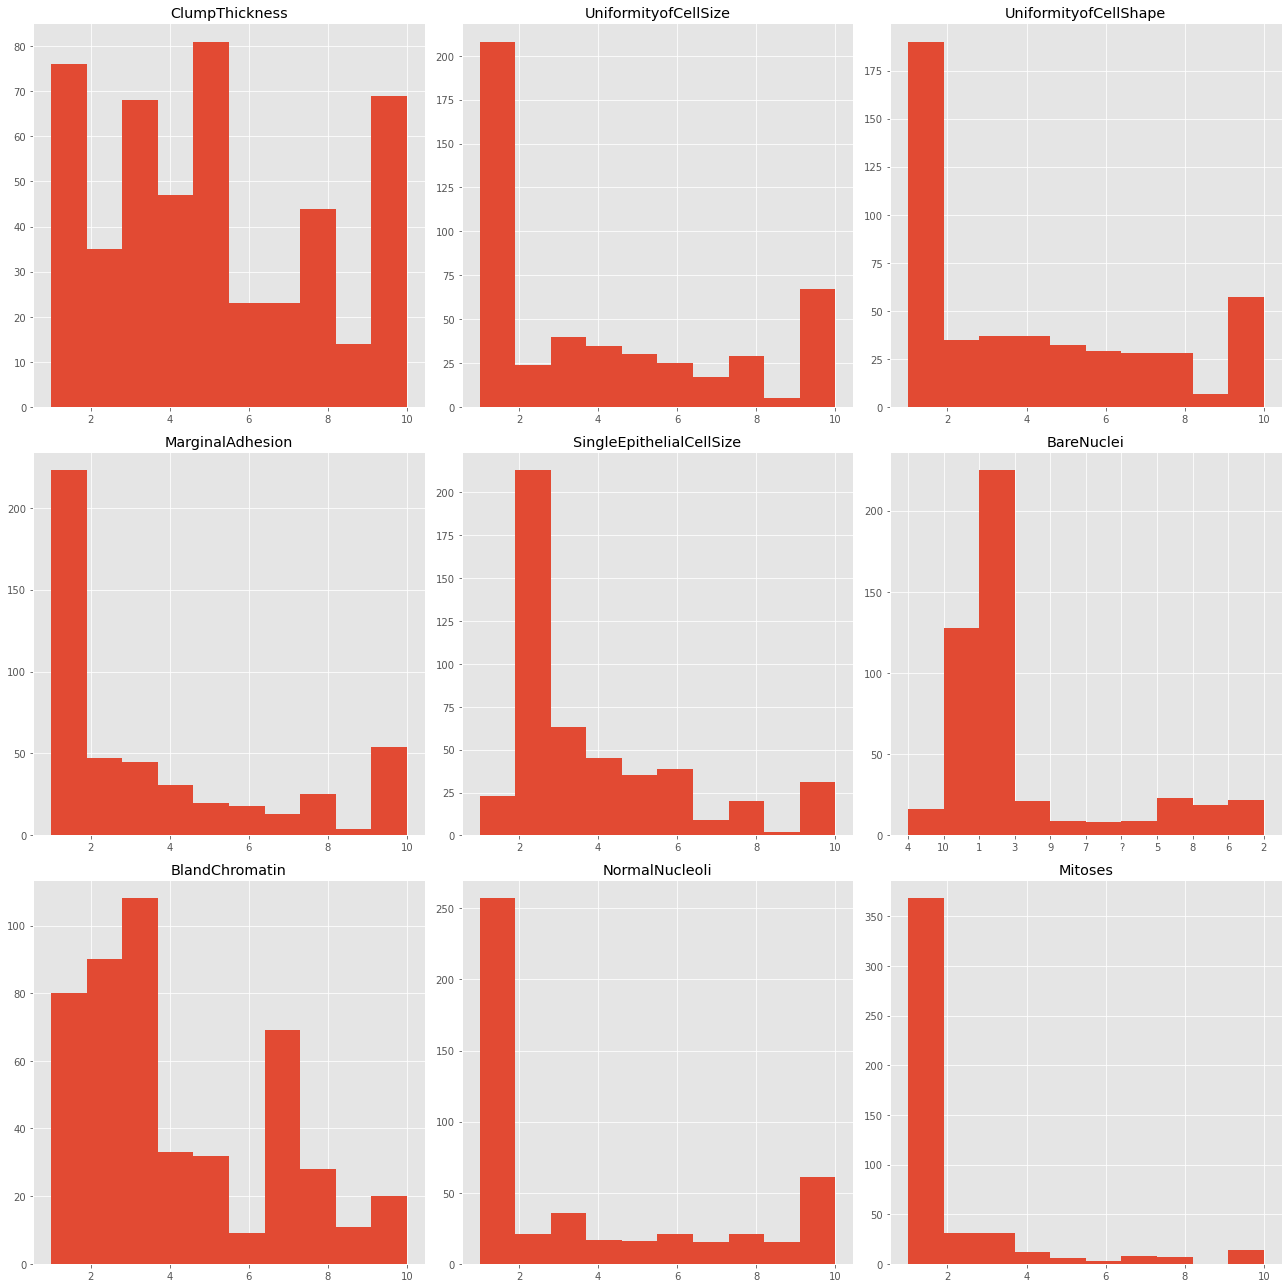

In [9]:
# plot date variables and find the variables with similar distributions, keep only one of them.
#['ClumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion',
#'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']
fig, axs = plt.subplots(3, 3, figsize=(18,18))
axs[0,0].hist(cancer['ClumpThickness'])
axs[0,0].set_title("ClumpThickness")
axs[0,1].hist(cancer['UniformityofCellSize'])
axs[0,1].set_title("UniformityofCellSize")
axs[0,2].hist(cancer['UniformityofCellShape'])
axs[0,2].set_title("UniformityofCellShape")
axs[1,0].hist(cancer['MarginalAdhesion'])
axs[1,0].set_title("MarginalAdhesion")
axs[1,1].hist(cancer['SingleEpithelialCellSize'])
axs[1,1].set_title("SingleEpithelialCellSize")
axs[1,2].hist(cancer['BareNuclei'])
axs[1,2].set_title("BareNuclei")
axs[2,0].hist(cancer['BlandChromatin'])
axs[2,0].set_title("BlandChromatin")
axs[2,1].hist(cancer['NormalNucleoli'])
axs[2,1].set_title("NormalNucleoli")
axs[2,2].hist(cancer['Mitoses'])
axs[2,2].set_title("Mitoses")
fig.tight_layout()

<h3>1.1.2 Observations </h3>
<h3>1.1.3 Approach </h3>

<h3>1.2 Checking and Removing nan values</h3>

In [10]:
## TODO 
## Yixin remove the wasted steps from the code and only keep the most important data cleaning steps
cancer.dtypes.value_counts()

int64     9
object    1
dtype: int64

In [11]:
cancer.select_dtypes('object')

,BareNuclei
0,4
1,10
2,1
3,1
4,1
...,...
475,2
476,1
477,3
478,4


In [12]:
cancer = cancer.replace('?' ,np.nan)

##Finding the the count and percentage of values that are missing in the dataframe.
null1 = pd.DataFrame({'Count': cancer.isnull().sum(), 'Percent': 100*cancer.isnull().sum()/len(cancer)})

##printing columns with null count more than 0
null1[null1['Count'] > 0]

,Count,Percent
BareNuclei,9,1.875


In [13]:
## Filling the columns with nan values with mean of the data
cancer["BareNuclei"]=cancer["BareNuclei"].astype(float)
cancer=cancer.fillna(cancer.mean())

<h3>1.2.2 Observations </h3>
<h3>1.2.3 Approach </h3>

<h3>1.3 Removing Useless Attributes </h3>

In [14]:
corr_list1=cancer.corr()['classes'].abs().sort_values(ascending=False)
corr_list_new=corr_list1[corr_list1>0.01].index.values.tolist()
corr_list1
cancer=cancer[corr_list_new]
cancer.head(3)

,classes,BareNuclei,UniformityofCellShape,UniformityofCellSize,BlandChromatin,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,4.0,8,8,3,6,7,1,3,1
1,1,10.0,10,10,9,8,7,8,7,1
2,0,1.0,2,1,3,2,1,1,2,1


In [15]:
## To remove outliers first we have to find the correlation between attributes

#find the variables with high correlations
cor1 = cancer.corr().abs()
list1 = cor1.stack().sort_values(ascending=False).drop_duplicates()  
high_corr= list1[list1>0.70].index.values.tolist()
high_corr.remove(high_corr[0])

display(list1)

classes                   classes                     1.000000
UniformityofCellShape     UniformityofCellSize        0.898337
BareNuclei                classes                     0.807094
classes                   UniformityofCellShape       0.800917
                          UniformityofCellSize        0.798326
                          BlandChromatin              0.738348
BlandChromatin            UniformityofCellSize        0.737284
classes                   ClumpThickness              0.728639
SingleEpithelialCellSize  UniformityofCellSize        0.724716
UniformityofCellShape     BlandChromatin              0.714699
                          NormalNucleoli              0.693236
NormalNucleoli            UniformityofCellSize        0.691315
UniformityofCellShape     SingleEpithelialCellSize    0.690709
classes                   NormalNucleoli              0.689144
MarginalAdhesion          UniformityofCellSize        0.673641
                          classes                     0

In [16]:
# for variable pairs with high correlation, keep only one of them
columnlist=list(cancer.columns)
len(high_corr)
for i in range(len(high_corr)):
    if "classes" in high_corr[i]:
        columnlist=columnlist
    else:
        if high_corr[i][0] in columnlist and high_corr[i][1] in columnlist:
            columnlist.remove(high_corr[i][1])
        else:
            columnlist=columnlist
cancer_final=cancer[columnlist]

In [17]:
## Doing a test train split on the data 
import random
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(cancer_final,random_state=None, shuffle=True)
train_x=training_data.drop(['classes'], 1) 
train_y=training_data[['classes']]
test_x=test_data.drop(['classes'], 1)
test_y=test_data[['classes']]

<h3>1.3.2 Observations </h3>


<h3>1.3.3 Approach </h3>

<h3>1.4 Deleting Outliers and Data Normalizations</h3>

In [18]:
# Remove outliers
cancer_norm = cancer_final[(np.abs(scipy.stats.zscore(cancer_final)) < 3).all(axis=1)]
# Zero mean normalisation
cancer_norm.iloc[:,1:]=(cancer_norm.iloc[:,1:]-cancer_norm.iloc[:,1:].mean())/cancer_norm.iloc[:,1:].std()

In [19]:
cancer_norm.head()

,classes,BareNuclei,UniformityofCellShape,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,-0.089238,1.350078,0.378015,1.102880,-0.751985,-0.235368,-0.404347
1,1,1.455944,1.990580,1.054464,1.102880,1.546900,1.514169,-0.404347
2,0,-0.861830,-0.571428,-0.974882,-0.718062,-0.751985,-0.672752,-0.404347
3,0,-0.861830,-0.891679,-0.974882,-0.718062,-0.751985,-0.672752,3.032604
4,0,-0.861830,-0.891679,-1.313106,-0.718062,-0.751985,-1.110137,-0.404347


In [20]:
#split the new dataset
training_data_norm, test_data_norm = train_test_split(cancer_norm,random_state=None, shuffle=True)
train_x_norm=training_data_norm.drop(['classes'], 1) 
train_y_norm=training_data_norm[['classes']]
test_x_norm=test_data_norm.drop(['classes'], 1)
test_y_norm=test_data_norm[['classes']]

In [21]:
x_train = np.array(train_x_norm)
print(x_train.shape)
y_train = np.array(train_y_norm)
print(y_train.shape)
x_test = np.array(test_x_norm)
print(x_test.shape)
y_test = np.array(test_y_norm)
print(y_test.shape)

(344, 7)
(344, 1)
(115, 7)
(115, 1)


<h3>1.4.2 Observations</h3>
<!---> Here will add what are the observations of each and every chapter <--->
<h3>1.4.3 Approach </h3>


<h3>1.5 Conclusion </h3>

<h2><center>2. Model Fiting on the clean data</center></h2>

We have a cleaned and a normalized data now we just have to fit a model over the data and make predictions.
We are going to implement 2 models that are implemented by us 

<ol>
    <li>SGD Classifier with Log Loss</li>
    <li>SVM with RBF kernel</li>
</ol>


<h3>2.1 SGD Classifier with Log Loss</h3>

<h4>2.1.1 Function Call</h4>

In [22]:
import Sgd_classifier as classfier_1
alpha=0.0001
eta0=0.01
N=len(x_train)
epochs=75
p = 2
w,b,train_loss,test_loss=classfier_1.train(x_train,y_train,x_test,y_test,epochs,alpha,eta0,p)


 12%|█▏        | 9/75 [00:00<00:00, 89.17it/s]


-- Epoch no(iteration no)  1 
 Train data set : 
W intercept: [0.0972246  0.08530624 0.07554367 0.0698289  0.07623768 0.07383376
 0.04321369], B intercept: [-0.02195136], Train loss: 0.23058084764601675, Test loss: 0.22889049396668087

-- Epoch no(iteration no)  2 
 Train data set : 
W intercept: [0.16127311 0.16958349 0.16346297 0.13282603 0.10829376 0.14582613
 0.05797147], B intercept: [-0.00968502], Train loss: 0.18506620796895412, Test loss: 0.18359552550369035

-- Epoch no(iteration no)  3 
 Train data set : 
W intercept: [0.23106148 0.22649795 0.19763329 0.17855046 0.15383624 0.20370847
 0.08939665], B intercept: [-0.01421422], Train loss: 0.1561128731369699, Test loss: 0.15401302283952734

-- Epoch no(iteration no)  4 
 Train data set : 
W intercept: [0.27519796 0.28106968 0.24707548 0.22725461 0.18654964 0.25659733
 0.11443373], B intercept: [-0.00722061], Train loss: 0.13465635377967167, Test loss: 0.13239870743144602

-- Epoch no(iteration no)  5 
 Train data set : 
W inter

 25%|██▌       | 19/75 [00:00<00:00, 93.66it/s]


-- Epoch no(iteration no)  15 
 Train data set : 
W intercept: [0.60435051 0.55422536 0.50876562 0.44635711 0.39230634 0.42034107
 0.2025638 ], B intercept: [0.01255045], Train loss: 0.06925927578812875, Test loss: 0.06526729160101666

-- Epoch no(iteration no)  16 
 Train data set : 
W intercept: [0.6200653  0.57110041 0.53050209 0.45866177 0.39369926 0.43709403
 0.2013372 ], B intercept: [0.02179589], Train loss: 0.06706606485368387, Test loss: 0.06325789594127879

-- Epoch no(iteration no)  17 
 Train data set : 
W intercept: [0.64497594 0.58505399 0.53814199 0.47331979 0.40292722 0.45569297
 0.2064203 ], B intercept: [0.02591643], Train loss: 0.06489987495525312, Test loss: 0.06109195743098568

-- Epoch no(iteration no)  18 
 Train data set : 
W intercept: [0.65300962 0.5988804  0.55232584 0.48859077 0.41410985 0.47659626
 0.21378741], B intercept: [0.02750594], Train loss: 0.06314002470132096, Test loss: 0.05930441753804758

-- Epoch no(iteration no)  19 
 Train data set : 
W int

 39%|███▊      | 29/75 [00:00<00:00, 92.52it/s]


-- Epoch no(iteration no)  20 
 Train data set : 
W intercept: [0.69693892 0.61917987 0.57989752 0.50771019 0.42749506 0.49420247
 0.22118755], B intercept: [0.05126348], Train loss: 0.05986458670727317, Test loss: 0.05613825279518439

-- Epoch no(iteration no)  21 
 Train data set : 
W intercept: [0.72024309 0.63517151 0.59447069 0.51022078 0.43137424 0.50559815
 0.21988153], B intercept: [0.05504797], Train loss: 0.05835963676131535, Test loss: 0.054635576106398284

-- Epoch no(iteration no)  22 
 Train data set : 
W intercept: [0.72793785 0.65227358 0.59557272 0.51134134 0.43204011 0.50088327
 0.21938581], B intercept: [0.06603228], Train loss: 0.057754231649537406, Test loss: 0.05420613525856412

-- Epoch no(iteration no)  23 
 Train data set : 
W intercept: [0.74610699 0.65957149 0.60213038 0.51781433 0.45037395 0.49682394
 0.222111  ], B intercept: [0.07690675], Train loss: 0.05667509101540983, Test loss: 0.05304188688609343

-- Epoch no(iteration no)  24 
 Train data set : 
W i

 65%|██████▌   | 49/75 [00:00<00:00, 90.45it/s]

 39 
 Train data set : 
W intercept: [0.92068446 0.80512174 0.73353136 0.62533287 0.53766268 0.57946256
 0.25575337], B intercept: [0.12652354], Train loss: 0.045826626116648096, Test loss: 0.04211409253457016

-- Epoch no(iteration no)  40 
 Train data set : 
W intercept: [0.92989729 0.81493513 0.74223637 0.63388972 0.54680052 0.58217822
 0.26079478], B intercept: [0.11859228], Train loss: 0.04537974560482068, Test loss: 0.04149986504405119

-- Epoch no(iteration no)  41 
 Train data set : 
W intercept: [0.93574608 0.81746038 0.75312269 0.63806856 0.54709035 0.58645629
 0.26830366], B intercept: [0.12172337], Train loss: 0.045041831417141534, Test loss: 0.041143618748195394

-- Epoch no(iteration no)  42 
 Train data set : 
W intercept: [0.94023779 0.81727409 0.76198403 0.6392456  0.54623736 0.58409171
 0.26585634], B intercept: [0.13255985], Train loss: 0.0448142861229828, Test loss: 0.041035400908646956

-- Epoch no(iteration no)  43 
 Train data set : 
W intercept: [0.94923205 0.82

 92%|█████████▏| 69/75 [00:00<00:00, 92.04it/s]


-- Epoch no(iteration no)  57 
 Train data set : 
W intercept: [1.05190306 0.9028484  0.84397421 0.6890093  0.58197108 0.63022098
 0.27778055], B intercept: [0.19939981], Train loss: 0.04051325884158474, Test loss: 0.037199958997898235

-- Epoch no(iteration no)  58 
 Train data set : 
W intercept: [1.06073965 0.90819788 0.84630861 0.69917089 0.58377626 0.64104646
 0.28021506], B intercept: [0.20447698], Train loss: 0.04020532600550463, Test loss: 0.036958099393798016

-- Epoch no(iteration no)  59 
 Train data set : 
W intercept: [1.06536815 0.91260331 0.85109374 0.70440774 0.58715578 0.64520854
 0.28305501], B intercept: [0.20320816], Train loss: 0.04003070419006765, Test loss: 0.036743398862966944

-- Epoch no(iteration no)  60 
 Train data set : 
W intercept: [1.07414845 0.91060989 0.85104558 0.70832585 0.59363448 0.65293115
 0.28333963], B intercept: [0.20347224], Train loss: 0.039876203492544296, Test loss: 0.03651200332981189

-- Epoch no(iteration no)  61 
 Train data set : 
W

100%|██████████| 75/75 [00:00<00:00, 91.91it/s]


-- Epoch no(iteration no)  72 
 Train data set : 
W intercept: [1.14369507 0.96786888 0.90338903 0.73574324 0.61094886 0.66895461
 0.29072212], B intercept: [0.2599848], Train loss: 0.03775358292519701, Test loss: 0.03487968857638966

-- Epoch no(iteration no)  73 
 Train data set : 
W intercept: [1.14472154 0.9718272  0.9074629  0.73948383 0.61512512 0.67779717
 0.29211715], B intercept: [0.26096386], Train loss: 0.03763257844470498, Test loss: 0.03474754184728843

-- Epoch no(iteration no)  74 
 Train data set : 
W intercept: [1.15710841 0.96840257 0.9033576  0.74456643 0.61992319 0.68243488
 0.29184097], B intercept: [0.26098857], Train loss: 0.03752161112426247, Test loss: 0.03456664743628254

-- Epoch no(iteration no)  75 
 Train data set : 
W intercept: [1.16243419 0.97591455 0.91140767 0.74601971 0.61710047 0.68289204
 0.29864226], B intercept: [0.27796181], Train loss: 0.03725388888332643, Test loss: 0.03448410073898851


<h4>2.1.2 Coding Approach</h4>

<!----> Will be going over the coding how it is done and stuff

<h3>2.2 SVM with RBF kernel </h3>

<h4>2.2.1 Function Call</h4>

<h4>2.2.2 Coding Approach</h4>

<!----> Will be going over the coding how it is done and stuff

<h2><center>3. Model Accuracy</center></h2>
<em>
Here we are going to talk about the model accuracies by using test and train loss graphs, in addition to Confussion Matrix and some ROC curves
</em>

<h3>3.1 Model 1 SGD Classifier with Log Loss</h3>


<h4>3.1.1 Prediction accuracies</h4>

In [23]:
y_train_pred = classfier_1.pred(w,b,x_train)
y_test_pred = classfier_1.pred(w,b,x_test)

y_train=y_train.reshape(y_train_pred.shape)
print('Train_Accuracy',1-np.sum(y_train - y_train_pred)/len(x_train))
y_test=y_test.reshape(y_test_pred.shape)
print('Test_Accuracy',1-np.sum(y_test  - y_test_pred)/len(x_test))

Train_Accuracy 0.9854651162790697
Test_Accuracy 1.017391304347826


<h4>3.1.2 Test and Train Loss over Epochs</h4>
We will plot graph against the number of epochs with respect to the test and train loss. This will give us insight whehter our code is performing gradient descent in a correct manner.

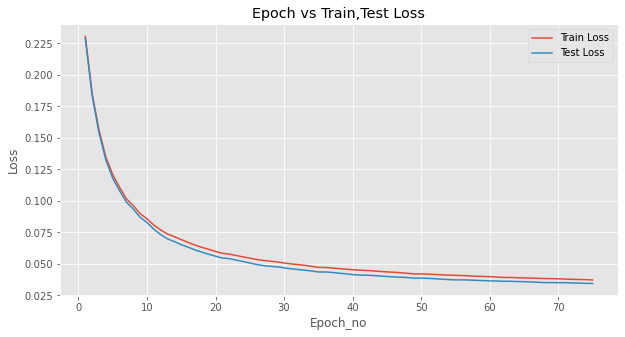

In [24]:
epochs = np.arange(1, epochs+1, 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Epoch vs Train,Test Loss')
plt.xlabel("Epoch_no")
plt.ylabel('Loss')
plt.legend()
print(100*'==')


<h4>3.1.3 Confusion Matrix </h4>
Here well will print the confusion matrix for the Model with its Precision and Recall values

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[173,   2],
       [  7, 162]])